# 1層順伝播ニューラルネットワークによる分類
まずは、下準備。

In [2]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
import copy
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib

# plotting tools
import matplotlib.pyplot as plt

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


補助ライブラリ（mlrefined_libraries）内の関数を用いているので、多くを説明する必要はないと思われる。まずは、`csvname`で指定された.csvファイルを読み込んで、ユニット（基底関数）の数を$1$から`num_units`まで変えて行きながら、それぞれにおいて、1層順伝播ニューラルネットワーク（活性化関数は`tanh`、コスト関数は`softmax`）を学習し、学習結果（というより、`mylib1`丸ごと）を`run1`に追加し、最後に、各ユニット数を用いた場合の分類結果（左側）、対応するコストの変遷（右側）にプロットしている（スライダーで、何個のユニット数を用いた場合かを調整可能）。

<b>講義資料にもあるように、コスト関数は非凸で、パラメータの初期値（ランダムに決定）によっては、適切なパラメータに辿り着かないことがあるので、その場合は、何回か実行してみること。</b>

また、こちらでは、`14_genreg_data.csv`, `14_new_circle_data.csv`, `14_2eggs_data.csv`の3つのデータで動作確認をしている。この他にも、同じ形式の.csvファイル（各行が1つの事例で、最終行がラベルを表している）を試してみるとよい。


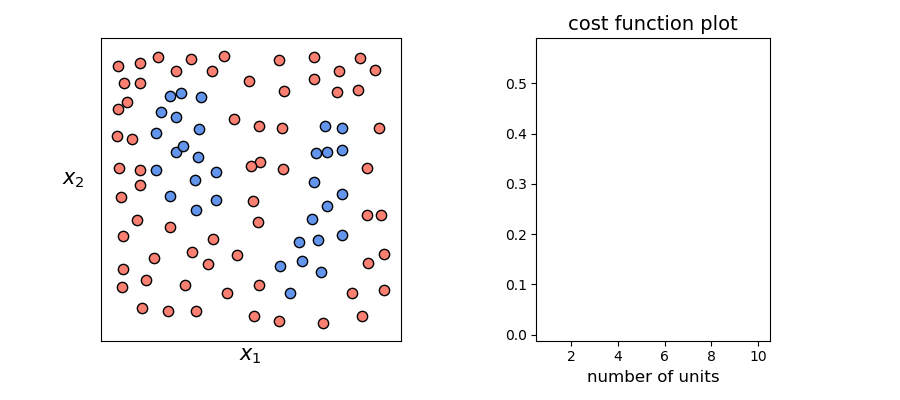
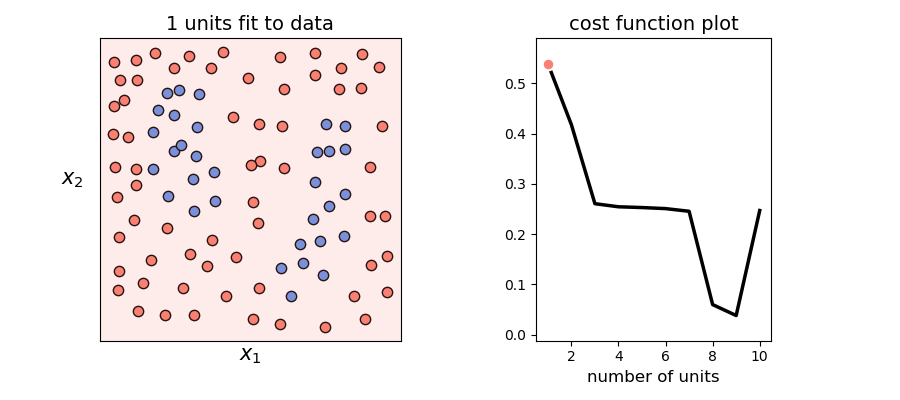
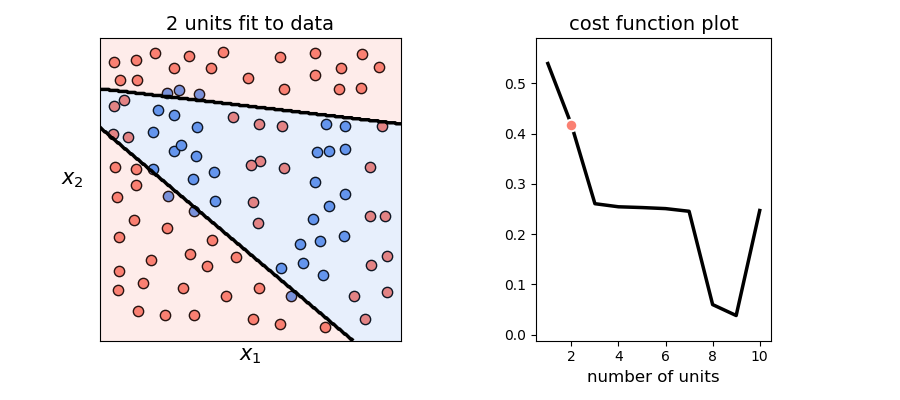
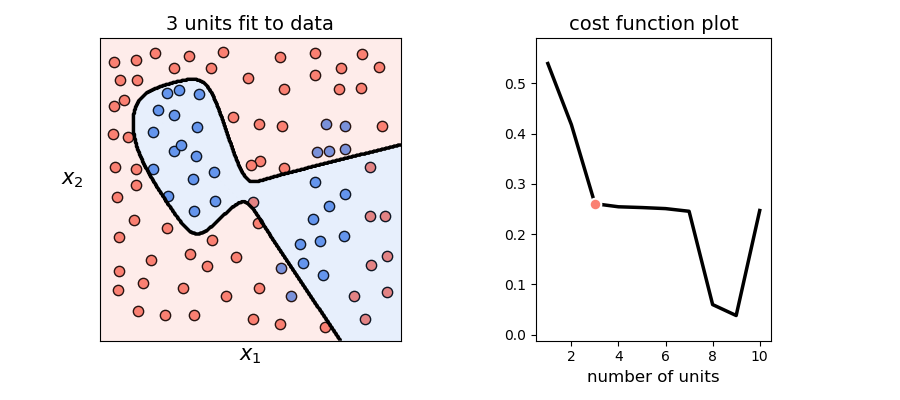
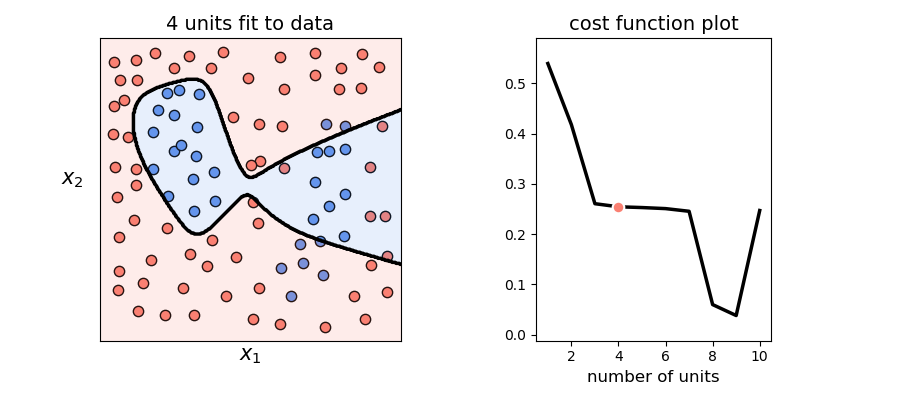
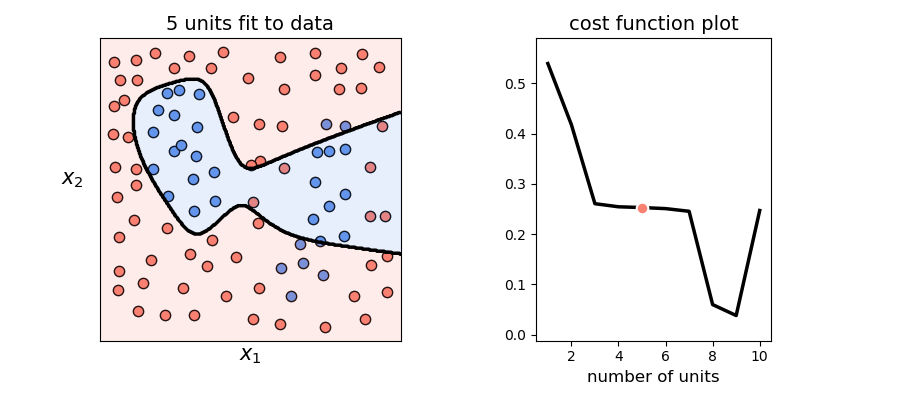
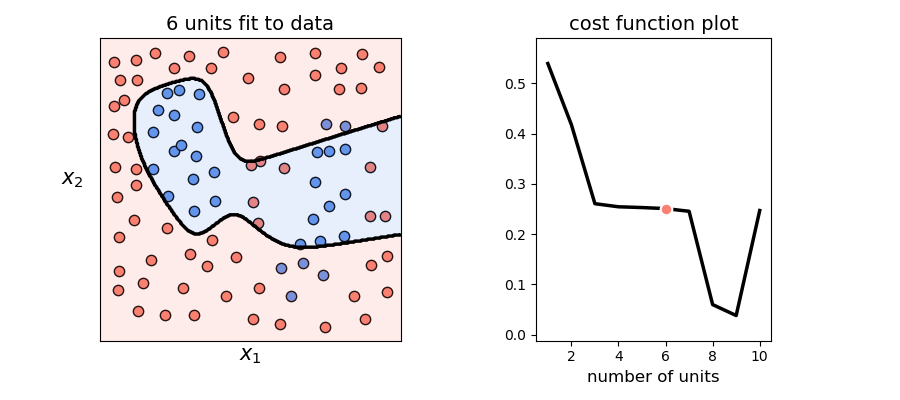
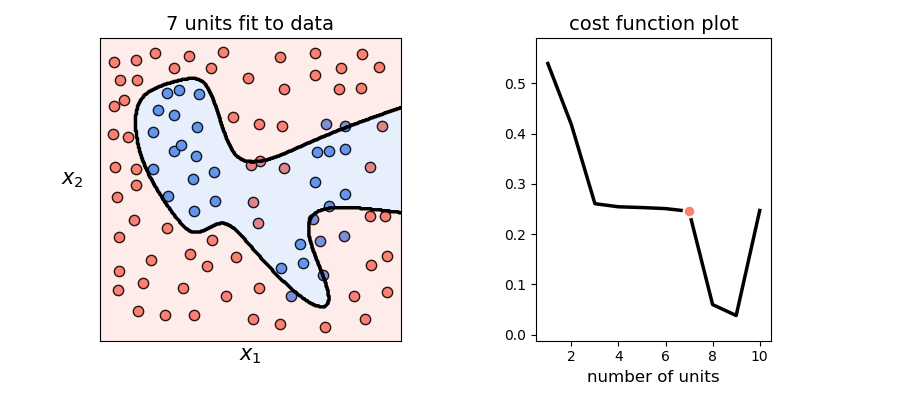
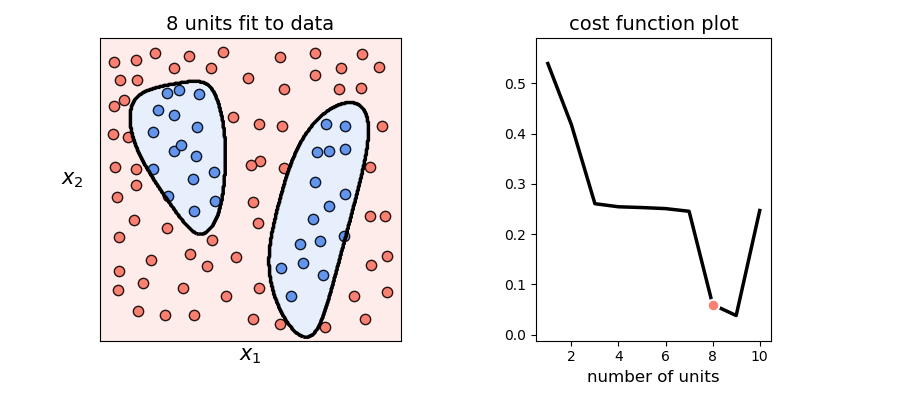
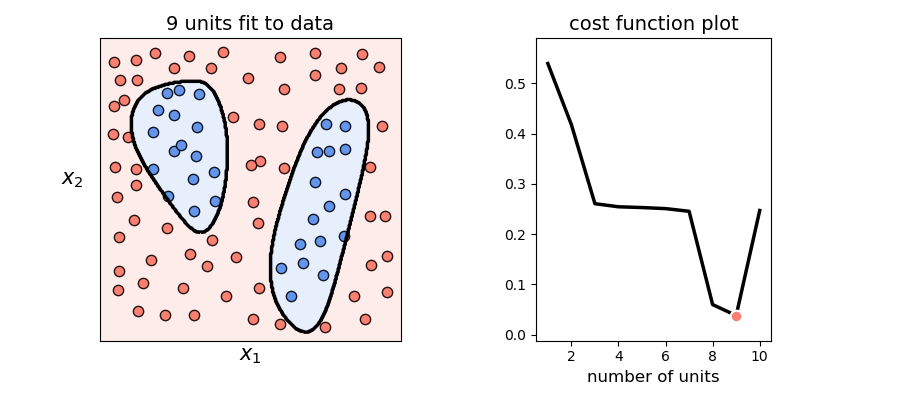
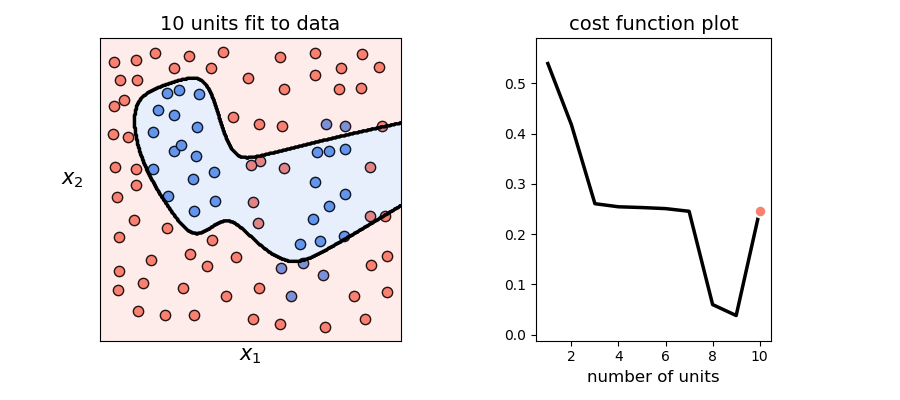

In [5]:
# the mid-point between each set of consecutive inputs along each input dimension
csvname = '14_2eggs_data.csv'  # '14_new_circle_data.csv'  # '14_genreg_data.csv'  # 
data = np.loadtxt(csvname,delimiter = ',')
# print(data.shape)
x = data[:-1,:]
y = data[-1:,:]
print("x:{}, y:{}".format(x.shape, y.shape))

num_units = 10
run1 = []
for j in range(num_units):
    
    print (">> Using {} units".format(j+1))
    
    # import the v1 library
    mylib1 = nonlib.library_v1.superlearn_setup.Setup(x,y)

    # choose features
    mylib1.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,j+1,1],activation = 'tanh')

    # choose normalizer
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # fit an optimization
    mylib1.fit(max_its = 2000,alpha_choice = 10**(0),optimizer = 'gradient descent')

    # add model to list
    run1.append(copy.deepcopy(mylib1))
    
# animate the business
frames = num_units
demo4 = nonlib.main_classification_animators.Visualizer(csvname)
demo4.animate_classifications(run1,frames)